In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# STORYTELLING with financial spendings.



***starting with a sample dataset***, we potentially want to investigate what insigths can be derived from a dataset concentrating ones spendings (Habits; trends etc.)
  
  ***with respect to time:***
 - How does the data differ from months to months
 - How does the data differ from summer vs. winter

therefore we differentiate the data regarding:
- fix vs. flexible costs
- basic need / luxoury ("nice to have") spendings

- are there any trends in the way money is spend?
- how does the absolute and relative spendings within the different categories differ?



# Data Inspection - unpreprocessed dataset

In [174]:
os.getcwd()
file_path01 = r"../data/cristina_dataset/Cristina_Dataset_230218.xlsx"
file_path02 = r"../data/cristina_dataset/Cristina_Dataset_230222.csv"



In [175]:
#read dataframe
df = pd.read_excel(file_path01)


In [176]:
#set up of the file
print(df.head(-5))
print("\n")
df.info()


       Category       Detail    Cost       Date
0    Eating Out       Brunch   15.00 2022-07-25
1      Shopping       Uniqlo  144.50 2022-07-25
2       Hobbies  Salsa Class  130.00 2022-07-27
3     Groceries    Groceries    6.78 2022-07-27
4    Eating Out       Ditsch    2.00 2022-07-27
..          ...          ...     ...        ...
301      Travel        Train   26.50 2023-02-03
302   Groceries    Groceries    8.94 2023-02-03
303    Shopping      Amarula   15.70 2023-02-04
304   Transport  Oslo ticket   30.19 2023-02-06
305   Transport  Oslo ticket   30.50 2023-02-13

[306 rows x 4 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Category  311 non-null    object        
 1   Detail    311 non-null    object        
 2   Cost      311 non-null    float64       
 3   Date      311 non-null    datetime64[ns]
dtypes: datetime64

In [177]:
print(df.Category.unique())
print("\n")
print(len(df.Category.unique()))
print("\n")
print(df.Detail.unique())


['Eating Out' 'Shopping' 'Hobbies' 'Groceries' 'Rent + Bills' 'Investment'
 'Transport' 'Student Loan' 'Travel' 'Healthcare' 'Selfcare']


11


['Brunch' 'Uniqlo' 'Salsa Class' 'Groceries' 'Ditsch'
 'Shared Rent + Bills expenses' 'Moving' 'Weekly ETH' 'Rent' 'BVG' 'Phone'
 'Postal re-route' 'Snacks' 'Bi-Weekly ETF' 'Stock' 'Passport photos'
 'Restaurant + Drinks' 'Salsa Festival Surcharge'
 'Driver license conversion' 'Student Loan' 'Sisyphos' 'Google' 'Patreon'
 'Insurance' 'Post salsa pizza' 'Pub Quiz' 'Flea market' 'Juice'
 'Poland Bus' 'Birthday present' 'Train castellvi' 'YEGO'
 'Pills pills pills ' 'Bi-Weekly Stock' 'Pills pills pills' 'Tampons'
 'Olive oil' 'Libro de la abuela' 'Spanish foooood' 'Taxi airport' 'Salsa'
 'Travel' 'Finger cut' 'Thai park' 'Baptism flight'
 'Train tickets to visit Fran' 'Teeth cleaning' 'Poland hotel' 'UK Phone'
 'Date' 'Salsa Festival' 'Extension ticket BVG' 'Extension ticket'
 'Avanico' 'Phone surcharge' 'Fruit' 'Hot water bottle' 'DM'
 'Vase and 

In [178]:
df[df["Category"]== "Investment"]

,Category,Detail,Cost,Date
11,Investment,Weekly ETH,6.0,2022-08-01
16,Investment,Weekly ETH,6.0,2022-07-25
17,Investment,Weekly ETH,10.0,2022-08-08
18,Investment,Weekly ETH,10.0,2022-08-15
19,Investment,Weekly ETH,10.0,2022-08-22
24,Investment,Bi-Weekly ETF,50.0,2022-08-16
25,Investment,Stock,10.0,2022-08-16
57,Investment,Weekly ETH,10.0,2022-08-29
58,Investment,Weekly ETH,10.0,2022-09-05
59,Investment,Weekly ETH,10.0,2022-09-12


# Data Inspection - preprocessed dataset

In [179]:
df01 = pd.read_csv(file_path02)
df01

,Category,Detail,Cost,Date
0,Eating Out,Brunch,€15.00,25-Jul-2022
1,Shopping,Uniqlo,€144.50,25-Jul-2022
2,Hobbies,Salsa Class,€130.00,27-Jul-2022
3,Groceries,Groceries,€6.78,27-Jul-2022
4,Eating Out,Ditsch,€2.00,27-Jul-2022
...,...,...,...,...
319,Groceries,Groceries,€4.07,20-Feb-2023
320,Eating Out,Lunch,€1.92,20-Feb-2023
321,Shopping,Ikea,€74.78,21-Feb-2023
322,Eating Out,Ikea,€9.59,21-Feb-2023


In [180]:
#Checking for NA values
df01.isna().sum()

Category    0
Detail      0
Cost        0
Date        0
dtype: int64

In [181]:
# Checking data types
df01.dtypes

Category    object
Detail      object
Cost        object
Date        object
dtype: object

In [182]:
# Checking the shape of the dataframe
df01.shape

print("The dataframe has 324 rows and 4 columns.")

The dataframe has 324 rows and 4 columns.


#### Working with and standardising columns

In [183]:
# Built-in library to work with dates.
from datetime import datetime

In [184]:
# Converting date column
df01["Date"] = df01["Date"].apply(lambda val: datetime.strptime(val, "%d-%b-%Y"))

In [185]:
# Convert the 'cost' column to float
df01['Cost'] = df01['Cost'].str.replace('€', '').astype(float)

In [186]:
# Checking code worked
df01.dtypes

Category            object
Detail              object
Cost               float64
Date        datetime64[ns]
dtype: object

### Looking at the data

#### Cost vs Category

In [196]:
# Calculate the total cost for each category
category_costs = df01.groupby('Category')['Cost'].sum().round(2).sort_values(ascending=False)
category_costs

Category
Rent + Bills    3645.36
Groceries       1405.87
Shopping        1251.30
Travel           828.72
Eating Out       642.66
Student Loan     597.38
Transport        554.69
Investment       487.00
Hobbies          385.98
Healthcare       340.05
Selfcare         184.17
Name: Cost, dtype: float64

In [199]:
# Calculate the percentage of the total cost for each category
category_percentages = ((category_costs / category_costs.sum()) * 100).round(2)
category_percentages

Category
Rent + Bills    35.31
Groceries       13.62
Shopping        12.12
Travel           8.03
Eating Out       6.23
Student Loan     5.79
Transport        5.37
Investment       4.72
Hobbies          3.74
Healthcare       3.29
Selfcare         1.78
Name: Cost, dtype: float64

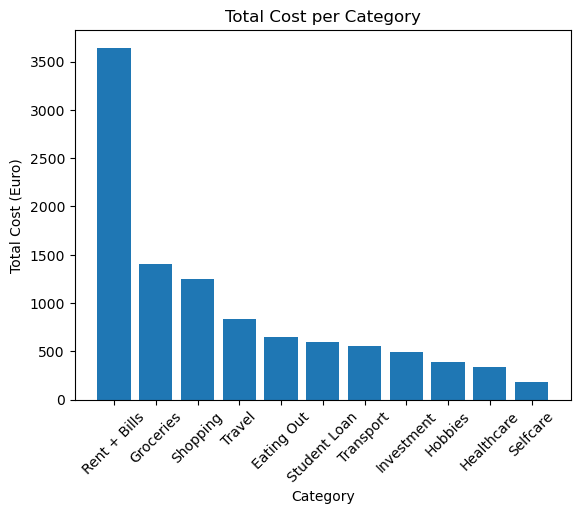

In [197]:
# Create a bar chart of the total cost for each category
fig, ax = plt.subplots()
ax.bar(category_costs.index, category_costs)

# Set the title and axis labels
ax.set_title('Total Cost per Category')
ax.set_xlabel('Category')
ax.set_ylabel('Total Cost (Euro)')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()